In [5]:
# 導入套件
import pandas as pd
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import matplotlib as plt
import math

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from keras import layers
from keras import models

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [6]:
# 從 D槽導入資料
training_dataset = pd.read_csv('D:\\Crawler\\DownloadData\\SPY.csv')
training_dataset # 顯示資料

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-24,202.000000,203.160004,201.740005,203.119995,184.766357,84360900
1,2016-03-28,203.610001,203.860001,202.710007,203.240005,184.875488,62408200
2,2016-03-29,202.759995,205.250000,202.399994,205.119995,186.585632,92922900
3,2016-03-30,206.300003,206.869995,205.589996,206.020004,187.404327,86365300
4,2016-03-31,205.910004,206.410004,205.330002,205.520004,186.949509,94584100
...,...,...,...,...,...,...,...
1253,2021-03-17,394.529999,398.119995,393.299988,397.260010,395.963135,91822000
1254,2021-03-18,394.480011,396.720001,390.750000,391.480011,390.201996,115112500
1255,2021-03-19,389.880005,391.570007,387.149994,389.480011,389.480011,112777800
1256,2021-03-22,390.029999,394.070007,389.970001,392.589996,392.589996,73778600


In [7]:
print(training_dataset.isnull().sum()) #檢查空值，避免圖形改變

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
# 刪除除了 Open、High、Low 的資料
training_dataset.drop(['Date','Close','Adj Close','Volume'], axis = 1, inplace = True) 

<AxesSubplot:title={'center':'SPY Stock'}>

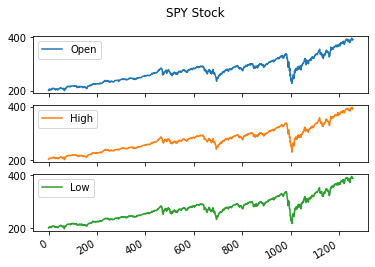

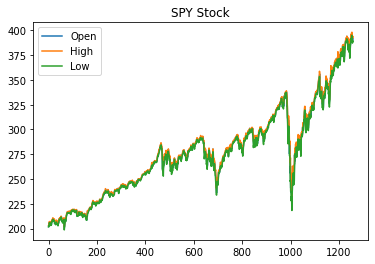

In [9]:
# 可視化數據
training_dataset.plot.line(subplots = True, title='SPY Stock')
training_dataset.plot(title = 'SPY Stock')

In [11]:
training_dataset.drop(['High','Low'], axis=1, inplace = True) # 刪除 High、Low的資料
training_dataset.drop(training_dataset.tail(2).index,inplace=True) # 刪除最下面的兩行資料，獲得更乾淨的數字
print(training_dataset)
print(training_dataset.shape)

            Open
0     202.000000
1     203.610001
2     202.759995
3     206.300003
4     205.910004
...          ...
1251  394.329987
1252  397.070007
1253  394.529999
1254  394.480011
1255  389.880005

[1256 rows x 1 columns]
(1256, 1)


In [12]:
train_data = training_dataset.to_numpy() # 使數據轉成numpy數據
train_data

array([[202.      ],
       [203.610001],
       [202.759995],
       ...,
       [394.529999],
       [394.480011],
       [389.880005]])

In [13]:
dataset_train = np.array(train_data[:int(train_data.shape[0]*0.8)]) 
dataset_test = np.array(train_data[int(train_data.shape[0]*0.8):])
print(dataset_train.shape)
print(dataset_test.shape)

(1004, 1)
(252, 1)


In [14]:
# 將數據縮小到 0 ~ 1之間
scalar = MinMaxScaler(feature_range = (0,1))
train_data = scalar.fit_transform(dataset_train) 
train_data.shape

(1004, 1)

In [15]:
x_train = train_data[0:1003]
y_train = train_data[1:1004]

x_train = np.reshape(x_train, (1003,1,1))
x_train.shape

(1003, 1, 1)